In [3]:
# all imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [5]:
# load the dataset
df = pd.read_csv("Social_Network_Ads.csv") 

In [6]:
df.head()  # show first 5 rows

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# select features and target
X = df[['Age', 'EstimatedSalary']]  # input features
y = df['Purchased']  # target variable

In [8]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [10]:
# predict on test data
y_pred = model.predict(X_test)


In [11]:
# compute confusion matrix and extract TP, FP, TN, FN
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# print confusion matrix values
print("Confusion Matrix:\n", cm)
print("TP:", TP)
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)


Confusion Matrix:
 [[50  2]
 [ 7 21]]
TP: 21
FP: 2
TN: 50
FN: 7


In [12]:
# calculate and print accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Error Rate:", round(error_rate, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))


Accuracy: 0.89
Error Rate: 0.11
Precision: 0.91
Recall: 0.75


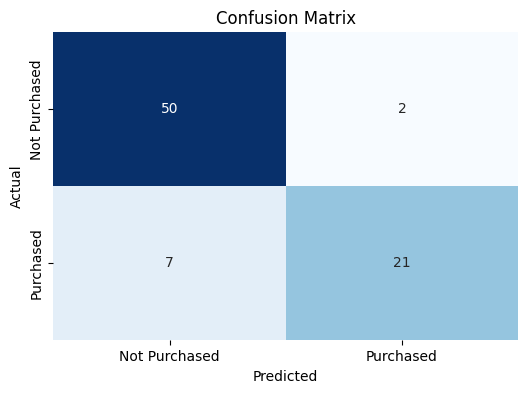

In [14]:
# import seaborn for heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# compute confusion matrix again (just to be sure)
cm = confusion_matrix(y_test, y_pred)

# draw the confusion matrix using seaborn
plt.figure(figsize=(6, 4))  # set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])  # draw heatmap
plt.title('Confusion Matrix')  # title
plt.xlabel('Predicted')  # x-axis label
plt.ylabel('Actual')  # y-axis label
plt.show()  # display the plot
